### Problem Statement
Rate of divorce in Singapore over the years.

Data from the Department of Statistics show that annulments, marriage dissolutions, and Divorce rates in Singapore remain at an all-time high. In 2020 alone, 6,959 married couples filed for Divorce. The Ministry of Social and Family Development (MSF) also discovered that recently-wed couples separate earlier than those married for a long time.

Social workers who work with divorcing couples attributed the trend to factors such as an increase in family stress factors, less quality time as more dual-income couples focus on their careers, shifting perceptions and less stigma towards divorce, and poor conflict management skills, among others.[https://www.straitstimes.com/singapore/more-spore-couples-especially-those-recently-married-getting-divorced-msf-report]

Communication with each other is top 4 reason for divorce. [https://blackbox.com.sg/everyone/honey-you-can-have-him-rising-divorce-in-singapore]

How attachment style affect communication?

## Success Metric

Accuracy?? F1 score? Precision?

## Import libraries

In [186]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
import re

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [187]:
# Set the display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [542]:
df = pd.read_csv('df.csv')

In [543]:
df['title_post'] = df['title'] + ' ' + df['post_text'].fillna('')

In [379]:
# Class 0 = Avoidant
# Class 1 = Anxious

df.head()

,title,post_text,class,title_post
0,Seriously though {FA}{DA},NaN,0,Seriously though {FA}{DA}
1,For all my favorite avoidants ❤️,NaN,0,For all my favorite avoidants ❤️
2,Anxious People on this subreddit: stop abandon...,If you’re anxious preoccupied or anxious leani...,0,Anxious People on this subreddit: stop abandon...
3,Same {FA},NaN,0,Same {FA}
4,And that’s on self development,NaN,0,And that’s on self development


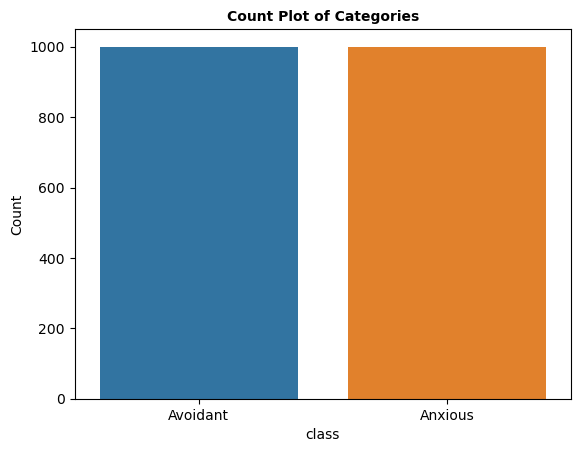

In [490]:
# Countplot of class
sns.countplot(x=df['class'])

# Set title and axis label
plt.title('Count Plot of Categories', fontsize=10, fontweight='bold')
plt.ylabel('Count')
plt.xticks([0,1],['Avoidant','Anxious'])

plt.show()

In [544]:
# List of stopwords
stopword = nltk.corpus.stopwords.words('english')

# Lemmatizer
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [545]:
# Remove punctuations
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['title_post_punct'] = df['title_post'].apply(lambda x: remove_punct(x.lower()))

# Remove words that contain http
def remove_url(text):
    text_nourl = re.sub(r'\S*http\S*', '', text)
    return text_nourl

df['title_post_clean'] = df['title_post_punct'].apply(lambda x: remove_url(x))

# Remove words that contain digit
def remove_digit(text):
    text_nodigit = re.sub(r'\w*\d\w*', '', text)
    return text_nodigit

df['title_post_clean'] = df['title_post_clean'].apply(lambda x: remove_digit(x))

# Tokenize
def tokenize(text):  
    # /W matches any character that is neither alphanumeric nor underscoreb
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

df['title_post_tokenized'] = df['title_post_clean'].apply(lambda x: tokenize(x)) 
# .lower to lowercase everything, otherwise will have variations of the same word (caps vs no caps)

# Remove stop words
def remove_stopwords(tokenized_list):
    #Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['title_post_nostop'] = df['title_post_tokenized'].apply(lambda x: remove_stopwords(x))

# Lemmatize (remove stop words)
def lemmatizing(tokenized_text):
    #return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return ' '.join(text)

df['title_post_lemma_nostop'] = df['title_post_nostop'].apply(lambda x: lemmatizing(x))

In [541]:
df.to_csv("merge.csv",index=False)

In [493]:
df.head()

,title,post_text,class,title_post,title_post_punct,title_post_clean,title_post_tokenized,title_post_nostop,title_post_lemma_nostop
0,Seriously though {FA}{DA},NaN,0,Seriously though {FA}{DA},seriously though fada,seriously though fada,"[seriously, though, fada, ]","[seriously, though, fada, ]",seriously though fada
1,For all my favorite avoidants ❤️,NaN,0,For all my favorite avoidants ❤️,for all my favorite avoidants ❤️,for all my favorite avoidants ❤️,"[for, all, my, favorite, avoidants, ]","[favorite, avoidants, ]",favorite avoidants
2,Anxious People on this subreddit: stop abandon...,If you’re anxious preoccupied or anxious leani...,0,Anxious People on this subreddit: stop abandon...,anxious people on this subreddit stop abandoni...,anxious people on this subreddit stop abandoni...,"[anxious, people, on, this, subreddit, stop, a...","[anxious, people, subreddit, stop, abandoning,...",anxious people subreddit stop abandoning blami...
3,Same {FA},NaN,0,Same {FA},same fa,same fa,"[same, fa, ]","[fa, ]",fa
4,And that’s on self development,NaN,0,And that’s on self development,and that’s on self development,and that’s on self development,"[and, that, s, on, self, development, ]","[self, development, ]",self development


In [546]:
from collections import Counter
# Separate the text into two lists based on class
class_0_text = df[df['class'] == 0]['title_post_lemma_nostop'].tolist()
class_1_text = df[df['class'] == 1]['title_post_lemma_nostop'].tolist()

# Function to find and count duplicate words between both classes
def find_duplicate_words_between_classes(df, column_name, class_column_name):
    class_0_text = df[df[class_column_name] == 0][column_name].tolist()
    class_1_text = df[df[class_column_name] == 1][column_name].tolist()
    
    all_words_class_0 = ' '.join(class_0_text).split()
    all_words_class_1 = ' '.join(class_1_text).split()
    
    common_words = set(all_words_class_0).intersection(all_words_class_1)
    
    word_counts_class_0 = Counter(all_words_class_0)
    word_counts_class_1 = Counter(all_words_class_1)
    
    top_common_words_class_0 = {word: word_counts_class_0[word] for word in common_words if word in word_counts_class_0}
    top_common_words_class_1 = {word: word_counts_class_1[word] for word in common_words if word in word_counts_class_1}
    
    return pd.DataFrame({'Duplicate Words': list(common_words), 
                         'Count (Class 0)': [top_common_words_class_0.get(word, 0) for word in common_words],
                         'Count (Class 1)': [top_common_words_class_1.get(word, 0) for word in common_words]})

# Get the DataFrame containing duplicate words and counts for both classes
duplicate_words_df = find_duplicate_words_between_classes(df, 'title_post_lemma_nostop', 'class')

# Calculate the difference in counts between Class 0 and Class 1 for each word
duplicate_words_df['Count Difference'] = (duplicate_words_df['Count (Class 0)'] - duplicate_words_df['Count (Class 1)']).abs()

# Sort the DataFrame by the largest difference in counts (descending order)
duplicate_words_df = duplicate_words_df.sort_values(by='Count Difference', ascending=True)

# Display the duplicate words and counts for both classes
print(duplicate_words_df)
print(duplicate_words_df.shape)

           Duplicate Words  Count (Class 0)  Count (Class 1)  Count Difference
5303                  peek                1                1                 0
812            nothingness                2                2                 0
811              rekindled                1                1                 0
3768                thatll                1                1                 0
3770                 basis                8                8                 0
808                 flaggy                1                1                 0
1492            meaningful               14               14                 0
3766                  semi                1                1                 0
3773               wishing                5                5                 0
3777           affirmation               15               15                 0
2477            needlessly                1                1                 0
801              hijacking                1         

In [547]:
df_final = duplicate_words_df[duplicate_words_df['Count Difference'].between(0, 10)]
df_final

,Duplicate Words,Count (Class 0),Count (Class 1),Count Difference
5303,peek,1,1,0
812,nothingness,2,2,0
811,rekindled,1,1,0
3768,thatll,1,1,0
3770,basis,8,8,0
808,flaggy,1,1,0
1492,meaningful,14,14,0
3766,semi,1,1,0
3773,wishing,5,5,0
3777,affirmation,15,15,0


In [118]:
## NEED TO CHANGE CHART TO REFLECT DUPLICATE WORDS

def top_20_words_nostopwords(class_,num):
    # instantiating countvectorizer
    cvec = CountVectorizer(ngram_range=(num, num))
    # fit and transform 
    X_nostop = cvec.fit_transform(df['title_post_lemma_nostop'].loc[df['class']==class_])
    # convert sparse matrix to dataframe
    nostop_count_df = pd.DataFrame(X_nostop.toarray(), columns=cvec.get_feature_names_out())
    # plot the count of top words
    plt.figure(figsize=(6,4))
    nostop_count_df.sum().sort_values(ascending=False).head(20).plot(kind='barh') 
    plt.title('Top 20 words (stop words removed)')

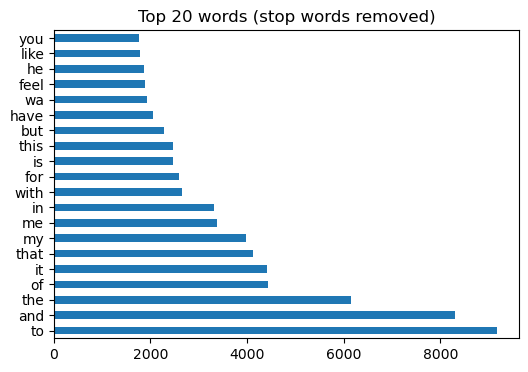

In [119]:
# top 20 words for 'avoidant' in unigram
top_20_words_nostopwords(0,1)

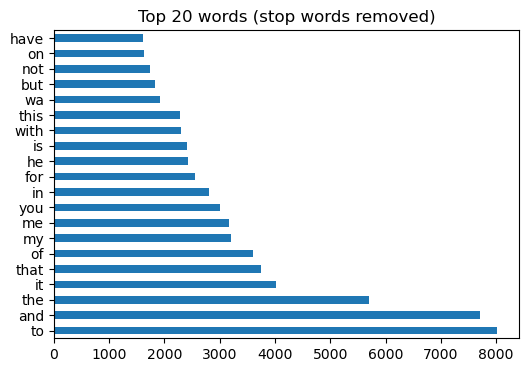

In [120]:
# top 20 words for 'anxious' in unigram
top_20_words_nostopwords(1,1)

In [548]:
## code for extra stop words

stopword += df_final['Duplicate Words'].tolist()

In [518]:
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [549]:
# Remove stop words
def remove_stopwords(tokenized_list):
    #Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['title_post_nostop'] = df['title_post_tokenized'].apply(lambda x: remove_stopwords(x))

# Lemmatize (remove stop words)
def lemmatizing(tokenized_text):
    #return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return ' '.join(text)

df['title_post_lemma_nostop'] = df['title_post_nostop'].apply(lambda x: lemmatizing(x))

In [550]:
# train/test split default accuracy
# Set up X and y
X = df['title_post_lemma_nostop']
y = df['class']

In [554]:
# code from kishan for smote

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def tfidvectorize_split_smote_logistic(X, y, test_size=0.4, random_state=42):
    # Step 1: Apply CountVectorizer
    #vectorizer = CountVectorizer(max_features=1000, min_df=2, ngram_range=(1,2))
    vectorizer = TfidfVectorizer(max_features=450, min_df=2, ngram_range=(1,2))
    X_vectorized = vectorizer.fit_transform(X)
    
    #'tvec__max_features': [5_000],  #[2_000, 3_000, 4_000, 5_000]
    #'tvec__min_df': [2], #[2, 3]
    #'tvec__max_df': [.9], #[.9, .95]
    #'tvec__ngram_range': [(1,2)],   #[(1,1), (1,2), (2,2)]

    
    # Step 2: Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=test_size, random_state=random_state)
    
    # Step 3: Apply SMOTE to the training data
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Step 4: Train a logistic regression model
    classifier = LogisticRegression(solver='liblinear')
    classifier.fit(X_train_resampled, y_train_resampled) 
    #classifier = MultinomialNB()
    #classifier.fit(X_train_resampled, y_train_resampled)
    
    #Step 5: Retrieve the coefficient and feature names 
    coef = classifier.coef_[0]
    features = vectorizer.get_feature_names_out() 
    feature_importance = pd.DataFrame({'Features': features, 'Importance': coef})
    # Separate positive and negative coefficients
    positive_coeffs = feature_importance[feature_importance['Importance'] > 0]
    negative_coeffs = feature_importance[feature_importance['Importance'] < 0]
    # Find the smallest positive coefficient
    largest_positive_coeff = positive_coeffs.nlargest(50, 'Importance')
    # Find the highest negative coefficient
    smallest_negative_coeff = negative_coeffs.nsmallest(50, 'Importance')
    

    # Step 5: Evaluate on training and test data
    train_predictions = classifier.predict(X_train_resampled)
    test_predictions = classifier.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_resampled, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    return train_accuracy, test_accuracy, smallest_negative_coeff, largest_positive_coeff

# Invoke Function 
tfidvectorize_split_smote_logistic(X,y)

(0.8883333333333333,
 0.8475,
                 Features  Importance
 150                   fa   -6.102934
 97                    da   -3.219903
 41              avoidant   -2.410909
 43             avoidants   -2.406043
 40             avoidance   -2.166365
 42   avoidant attachment   -1.636121
 128              emotion   -1.500427
 155              feeling   -1.471366
 169                  get   -1.436698
 103         deactivating   -1.427073
 267                  mom   -1.279795
 104         deactivation   -1.275428
 156                 felt   -1.222167
 116           dismissive   -1.133896
 39                 avoid   -1.106526
 89          conversation   -1.043694
 205                   im   -1.032946
 311             question   -1.008531
 153                 feel   -1.002183
 335               scared   -0.979667
 312                quite   -0.958324
 383                style   -0.947912
 301                point   -0.946651
 138                 ever   -0.929719
 427              wa